In [7]:
# Sam Brown
# sam_brown@mines.edu
# Date: 05/28/2025
# Goal: Identify and compare metrics for each station

#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates 
import scipy.signal

import my_lib.funcs

evts_path = "/Users/sambrown04/Documents/SURF/Events/2013_2013Events2stas"

In [8]:
events_list = my_lib.funcs.load_evt(evts_path)

In [9]:
events_list[0].head()

,Unnamed: 0,time,la01x,la01y,la01z,la01res,la01res_avg,la02x,la02y,la02z,...,gz17res,gz17res_avg,gz18x,gz18y,gz18z,gz18res,gz18res_avg,sum_res_avg,ressum,event
0,1634606,2013-10-11 18:51:30,-282631.516389,-560616.318475,94.3331,0.442123,0.338985,-276793.579511,-560938.207272,94.5066,...,0.002968,0.067066,-167757.779291,-588319.556813,53.8549,0.002892,0.055873,3.144578,3.293584,1.0
1,1634607,2013-10-11 18:51:45,-282631.510762,-560616.320296,94.3243,0.442123,0.338985,-276793.579335,-560938.209383,94.4484,...,0.002968,0.067066,-167757.778440,-588319.559887,53.8248,0.002892,0.055873,3.144578,3.293598,1.0
2,1634608,2013-10-11 18:52:00,-282631.516826,-560616.320627,94.3270,0.442123,0.338985,-276793.583686,-560938.207235,94.4889,...,0.002968,0.067066,-167757.781207,-588319.559098,53.8419,0.002892,0.055873,3.144578,3.293665,1.0
3,1634609,2013-10-11 18:52:15,-282631.511169,-560616.319413,94.3441,0.442123,0.338985,-276793.579448,-560938.208652,94.5002,...,0.002968,0.067066,-167757.778150,-588319.557138,53.8481,0.002892,0.055873,3.144578,3.293665,1.0
4,1634610,2013-10-11 18:52:30,-282631.516933,-560616.318878,94.3316,0.442123,0.338985,-276793.587073,-560938.207588,94.4717,...,0.002952,0.067066,-167757.782888,-588319.555473,53.8265,0.002892,0.055873,3.144578,3.430693,1.0


In [10]:
df_features = my_lib.funcs.extract_event_features(events_list)

In [12]:
df_features[9].head(40)

,station,pre-slip_area,slip_severity,peak_time,total_delta,start_time
0,la01x,154.212904,1.018658e-06,6195.0,0.378039,2013-02-26 11:25:00
1,la02x,88.751921,1.165940e-06,6180.0,0.376995,2013-02-26 11:25:00
2,la04x,63.638831,1.036212e-06,6135.0,0.390647,2013-02-26 11:25:00
3,la05x,58.394011,1.174470e-06,6135.0,0.407974,2013-02-26 11:25:00
4,la06x,46.591554,1.544414e-06,6120.0,0.442203,2013-02-26 11:25:00
5,la07x,99.263465,1.076499e-06,6075.0,0.370325,2013-02-26 11:25:00
6,la08x,140.887944,5.404853e-07,6075.0,0.260034,2013-02-26 11:25:00
7,la09x,779.801232,2.747557e-07,13890.0,0.120112,2013-02-26 11:25:00
8,la10x,51.056144,1.345490e-06,6075.0,0.444339,2013-02-26 11:25:00
9,la12x,678.786242,1.508378e-07,13560.0,0.108345,2013-02-26 11:25:00


In [13]:
columns = [ "pre-slip_area", "slip_severity", "peak_time", "total_delta", "start_time"]

LA_stations = [pd.DataFrame(columns=columns) for _ in range(18)]
GZ_stations = [pd.DataFrame(columns=columns) for _ in range(20)]
MG_stations = [pd.DataFrame(columns=columns) for _ in range(8)]

# loop through events
for i, event in enumerate(df_features):
    #loop through stations
    for index, row in event.iterrows():
        stationTicker = row[0][0:2]
        stationNumber = (row[0][2:4])
        if stationNumber != 'w1':
            stationNumber = int(stationNumber)
        
        if stationTicker == 'la': 
            LA_stations[stationNumber].loc[len(LA_stations[stationNumber])] = row.iloc[1:4].astype(float)

        elif stationTicker =='gz':
            GZ_stations[stationNumber].loc[len(GZ_stations[stationNumber])]= row.iloc[1:4].astype(float)

        elif stationTicker =='mg':
            MG_stations[stationNumber].loc[len(MG_stations[stationNumber])] = row.iloc[1:4].astype(float)
        
        

In [14]:
LA_stations[1] # only la stations operated in 2013 (view StationUptime.png) 


,pre-slip_area,slip_severity,peak_time,total_delta,start_time
0,89.912261,1.012927e-06,5895.0,NaN,NaN
1,86.194218,1.407709e-06,6765.0,NaN,NaN
2,89.192041,9.735783e-07,6015.0,NaN,NaN
3,158.986329,1.569315e-06,6825.0,NaN,NaN
4,154.212904,1.018658e-06,6195.0,NaN,NaN
...,...,...,...,...,...
329,58.285631,9.701548e-07,5700.0,NaN,NaN
330,136.212287,9.571080e-07,6015.0,NaN,NaN
331,142.270060,8.071369e-07,5805.0,NaN,NaN
332,149.603001,1.013896e-06,6300.0,NaN,NaN


In [15]:
LA_total = pd.concat([station for station in LA_stations], ignore_index=True)
GZ_total = pd.concat([station for station in GZ_stations], ignore_index=True)
MG_total = pd.concat([station for station in MG_stations], ignore_index=True)

In [16]:
LA_total.describe()

,pre-slip_area,slip_severity,peak_time,total_delta,start_time
count,3619.000000,3.619000e+03,3619.000000,0.0,0.0
mean,125.348720,9.135275e-07,6090.194805,NaN,NaN
std,153.210506,5.287544e-07,1986.634983,NaN,NaN
min,0.000000,9.206457e-08,0.000000,NaN,NaN
25%,62.161168,5.067447e-07,5355.000000,NaN,NaN
50%,90.955624,8.594144e-07,5940.000000,NaN,NaN
75%,122.331897,1.298398e-06,6615.000000,NaN,NaN
max,1822.980717,2.268546e-06,15285.000000,NaN,NaN


In [17]:
GZ_total.describe()

,pre-slip_area,slip_severity,peak_time,total_delta,start_time
count,5300.000000,5.300000e+03,5300.000000,0.0,0.0
mean,112.859409,8.395116e-07,5331.308491,NaN,NaN
std,106.683388,3.155974e-07,1122.884226,NaN,NaN
min,0.000000,2.057708e-07,0.000000,NaN,NaN
25%,67.712176,5.708197e-07,4665.000000,NaN,NaN
50%,103.575148,8.032141e-07,5580.000000,NaN,NaN
75%,143.589815,1.067902e-06,6150.000000,NaN,NaN
max,2658.043663,2.215890e-06,13725.000000,NaN,NaN


In [18]:
#MG_total.describe()

In [19]:
# Compare these metrics for each station within LA

for i, station in enumerate(LA_stations, 1):
    pre_slip_avg = station['pre-slip_area'].mean()
    slip_severity_avg = station['slip_severity'].mean()
    total_delta = station['total_delta'].mean()
    print(f"Station {i} averages: \n pre-slip area: {pre_slip_avg:.2f} \n severity: {slip_severity_avg:} \n Total Displacement: {total_delta}")


Station 1 averages: 
 pre-slip area: nan 
 severity: nan 
 Total Displacement: nan
Station 2 averages: 
 pre-slip area: 120.77 
 severity: 1.0099497625938463e-06 
 Total Displacement: nan
Station 3 averages: 
 pre-slip area: 98.89 
 severity: 1.064157313140583e-06 
 Total Displacement: nan
Station 4 averages: 
 pre-slip area: nan 
 severity: nan 
 Total Displacement: nan
Station 5 averages: 
 pre-slip area: 78.11 
 severity: 1.0048420100724133e-06 
 Total Displacement: nan
Station 6 averages: 
 pre-slip area: 68.55 
 severity: 1.0002312328888365e-06 
 Total Displacement: nan
Station 7 averages: 
 pre-slip area: 76.65 
 severity: 1.468527401185583e-06 
 Total Displacement: nan
Station 8 averages: 
 pre-slip area: 97.80 
 severity: 1.0137633040082548e-06 
 Total Displacement: nan
Station 9 averages: 
 pre-slip area: 125.91 
 severity: 5.688412175133806e-07 
 Total Displacement: nan
Station 10 averages: 
 pre-slip area: 249.15 
 severity: 2.179502548404921e-07 
 Total Displacement: nan
St

In [20]:
# new plotting function
# inputs generic events_list
# uses preprocessed events to get into a better form
# creates a plot
# loops through each event and plots the data for the specific station onto the axis

# updates: want all the stations lines in grey and the average line in red
# need all y values for each given x value 

def plot_station(events_list, station):
    pre_events = my_lib.funcs.preprocess_events(events_list)

    all_x = []
    all_y = []
    
    for event in pre_events:
        if station in event:
            x = event['time_sec']
            y = event[station]
            plt.plot(x, y, alpha=0.1)  # Individual lines
            all_x.append(np.array(x))
            all_y.append(np.array(y))
            
        
    if all_x:
        ref_x = all_x[0]
        # only use y arrays with the same length/time axis
        aligned_ys = [y for x, y in zip(all_x, all_y) if np.array_equal(x, ref_x)]
        if aligned_ys:
            avg_y = np.mean(aligned_ys, axis=0)
            plt.plot(ref_x, avg_y, color='red', linewidth=2, label='Average')

    plt.xlabel("Time (sec)")
    plt.ylabel(station)
    plt.title(f"{station} - All Events and Average")
    plt.legend()
    plt.show()

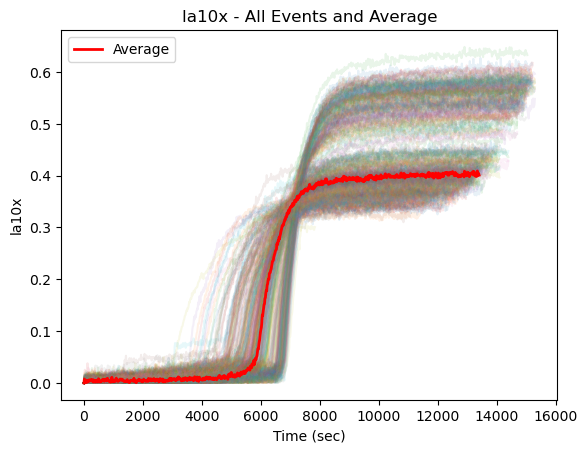

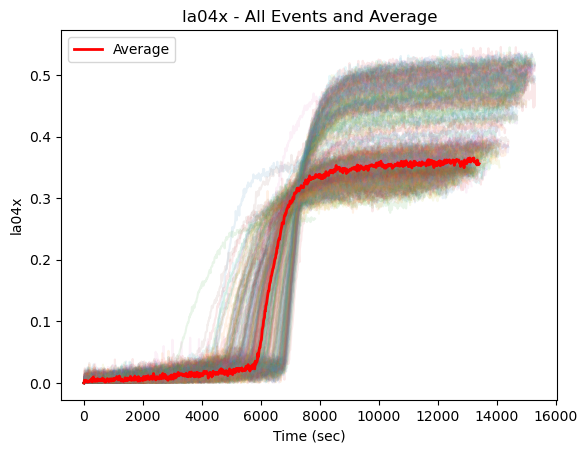

In [21]:
plot_station(events_list, 'la10x')
plot_station(events_list, 'la04x')


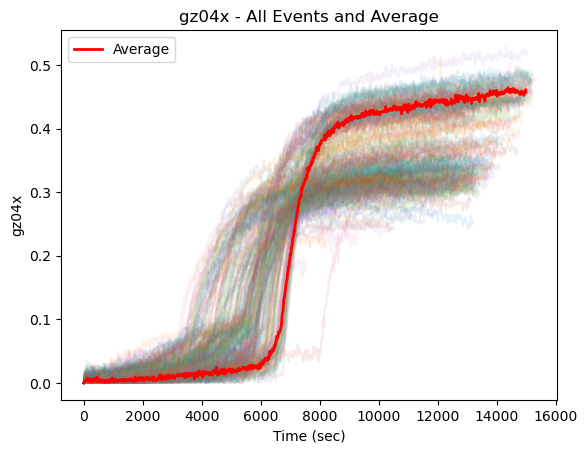

In [22]:
plot_station(events_list, 'gz04x')